# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

---
## 2. Load data

In [9]:
#df = pd.read_csv('./clean_data_after_eda.csv')
#df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
#df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
#df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
#df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [14]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [13]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_var'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_fix'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_var','offpeak_diff_dec_january_fix']]
diff.head()

,id,offpeak_diff_dec_january_var,offpeak_diff_dec_january_fix
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [12]:
my = pd.read_csv('merged_df.csv', index_col=[0])
my.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14606 entries, 0 to 14605
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   cons_12m                        14606 non-null  int64  
 2   cons_gas_12m                    14606 non-null  int64  
 3   cons_last_month                 14606 non-null  int64  
 4   date_activ                      14606 non-null  object 
 5   date_end                        14606 non-null  object 
 6   date_modif_prod                 14606 non-null  object 
 7   date_renewal                    14606 non-null  object 
 8   forecast_cons_12m               14606 non-null  float64
 9   forecast_cons_year              14606 non-null  int64  
 10  forecast_discount_energy        14606 non-null  float64
 11  forecast_meter_rent_12m         14606 non-null  float64
 12  forecast_price_energy_off_peak  

In [15]:
first_df = pd.read_csv('client_data.csv')
df = pd.merge(first_df[['id', 'channel_sales', 'origin_up']], my, on ='id')
df.head()

,id,channel_sales,origin_up,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,delta_price_mid_peak_var,delta_price_off_peak_fix,delta_price_peak_fix,delta_price_mid_peak_fix,avg_price_off_peak_var,avg_price_peak_var,avg_price_mid_peak_var,avg_price_off_peak_fix,avg_price_peak_fix,avg_price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,lxidpiddsbxsbosboudacockeimpuepw,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,-0.0715,3.7010,-0.0179,-0.0715,0.1248,0.1007,0.0665,40.9423,22.3520,14.9013
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,kamkkxfxxuwbdslkwifmmcsiusiuosws,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,0.0000,0.1778,0.0000,0.0000,0.1496,0.0071,0.0000,44.3114,0.0000,0.0000
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,kamkkxfxxuwbdslkwifmmcsiusiuosws,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,0.0000,0.1778,0.0005,0.0000,0.1705,0.0884,0.0000,44.3855,0.0000,0.0000
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,kamkkxfxxuwbdslkwifmmcsiusiuosws,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,...,0.0000,0.1778,0.0000,0.0000,0.1512,0.0000,0.0000,44.4003,0.0000,0.0000
4,149d57cf92fc41cf94415803a877cb4b,MISSING,kamkkxfxxuwbdslkwifmmcsiusiuosws,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,...,0.0035,0.1629,-0.0023,0.0035,0.1242,0.1036,0.0729,40.6882,24.4129,16.2753


In [ ]:
df = pd.merge(df,diff, on='id')


In [18]:
#mean differences among prices in different period 
df['off_peak_peak_mean_diff_var'] = df['avg_price_off_peak_var'] - df['avg_price_peak_var']
df['off_peak_mid_peak_mean_diff_var'] = df['avg_price_off_peak_var'] - df['avg_price_mid_peak_var']
df['peak_mid_peak_mean_diff_var'] = df['avg_price_peak_var'] - df['avg_price_mid_peak_var']

df['off_peak_peak_mean_diff_fix'] = df['avg_price_off_peak_fix' ]- df['avg_price_peak_fix']
df['off_peak_mid_peak_mean_diff_fix'] = df['avg_price_off_peak_fix'] - df['avg_price_mid_peak_fix']
df['peak_mid_peak_mean_diff_fix'] = df['avg_price_peak_fix'] - df['avg_price_mid_peak_fix']


In [22]:
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

df['tenure'] = ((df['date_end'] - df['date_activ']) / np.timedelta64(1, 'Y')).astype(int)

In [27]:
pd.crosstab(df['churn'],df['tenure'])

tenure,2,3,4,5,6,7,8,9,10,11,12,13
churn,,,,,,,,,,,,
0,228,1001,3323,2805,2836,2424,119,81,49,162,121,38
1,35,168,478,262,249,192,6,2,1,11,11,4


In [32]:
from datetime import datetime 
reference_date = datetime(2016,1,1)
reference_date

def calculate_diff_months(reference_date, df, column):
    delta=reference_date - df[column]
    month_delta = (delta/np.timedelta64(1, 'M')).astype(int)
    return month_delta 

df['months_active'] = calculate_diff_months(reference_date, df, 'date_activ')
df['months_till_end'] = -calculate_diff_months(reference_date, df, 'date_end')
df['months_from_modification'] = calculate_diff_months(reference_date, df, 'date_modif_prod')
df['months_from_renewal'] = calculate_diff_months(reference_date, df, 'date_renewal')

In [33]:
df.head()

,id,channel_sales,origin_up,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,off_peak_mid_peak_mean_diff_var,peak_mid_peak_mean_diff_var,off_peak_peak_mean_diff_fix,off_peak_mid_peak_mean_diff_fix,peak_mid_peak_mean_diff_fix,tenure,months_active,months_till_end,months_from_modification,months_from_renewal
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,lxidpiddsbxsbosboudacockeimpuepw,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,0.0583,0.0342,18.5903,26.0410,7.4507,3,30,5,2,6
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,kamkkxfxxuwbdslkwifmmcsiusiuosws,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,0.1496,0.0071,44.3114,44.3114,0.0000,7,76,7,76,4
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,kamkkxfxxuwbdslkwifmmcsiusiuosws,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,0.1705,0.0884,44.3855,44.3855,0.0000,6,68,3,68,8
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,kamkkxfxxuwbdslkwifmmcsiusiuosws,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,...,0.1512,0.0000,44.4003,44.4003,0.0000,6,69,2,69,9
4,149d57cf92fc41cf94415803a877cb4b,MISSING,kamkkxfxxuwbdslkwifmmcsiusiuosws,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,...,0.0513,0.0307,16.2753,24.4129,8.1376,6,71,2,71,9


Deltas are very much centered around 0, unfortunately there are couple of big outliers. 

To diff in 2nd step we can add column year_active since it seems like churners are rather younger companies, as well as num_products it seems like 
churners do not use more than 3 products. And we can add gas and energy vs , energy only column - this won't change much I think the prediction, but we can try

Another important observation is that Dataset is unbalanced, there app. 10% churners, this might bias the model .Therefore we can consider introducing undersampler to make the labels more balanced. Also, by knowing that we can decide to evaluate different model performance parameters and not just accuracy 

In [35]:
g = np.where(df['has_gas']=='t', 'eg', 'e.') # if user has gas then he uses gas and electricity , else only electricity 
df['energy_gas_products'] =g


In [36]:
#droping colls which are not usefull 
df.drop(['has_gas', 'date_activ', 'date_end','date_modif_prod', 'date_renewal'], inplace=True, axis=1)

### Transforming numerical data
In EDA part general observation was that numerical data is skewed, if we want to use predictive models we need to fulfill assumptions given by parametric models.
Variables have to be independent and normaly distributed.
We will apply logaritmic transformation to some features to make them more predictable, reduce they standard deviation 

In [37]:
df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,off_peak_mid_peak_mean_diff_var,peak_mid_peak_mean_diff_var,off_peak_peak_mean_diff_fix,off_peak_mid_peak_mean_diff_fix,peak_mid_peak_mean_diff_fix,tenure,months_active,months_till_end,months_from_modification,months_from_renewal
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,...,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,...,0.114053,0.023787,33.468017,36.831208,3.363191,5.317952,58.567301,6.393537,35.464056,4.910516
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,...,0.052635,0.028850,13.823113,10.228128,4.816152,1.695866,19.366745,3.513031,30.248229,3.795906
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,16.000000,0.000000,0.000000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,...,0.050700,0.000000,16.275300,24.412900,0.000000,4.000000,44.000000,3.000000,6.000000,2.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,...,0.147400,0.028900,44.266900,44.281700,0.000000,5.000000,57.000000,6.000000,30.000000,5.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,...,0.150200,0.030400,44.365100,44.370600,8.121400,6.000000,71.000000,9.000000,64.000000,8.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,...,0.278100,0.196300,59.286200,59.286200,28.123000,13.000000,151.000000,17.000000,151.000000,30.000000


In [39]:
log_transform = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m','forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m',\
    'forecast_price_energy_off_peak','forecast_price_energy_peak','forecast_price_pow_off_peak' ]
for col in log_transform:
    df[col] = np.log10(df[col]+1)

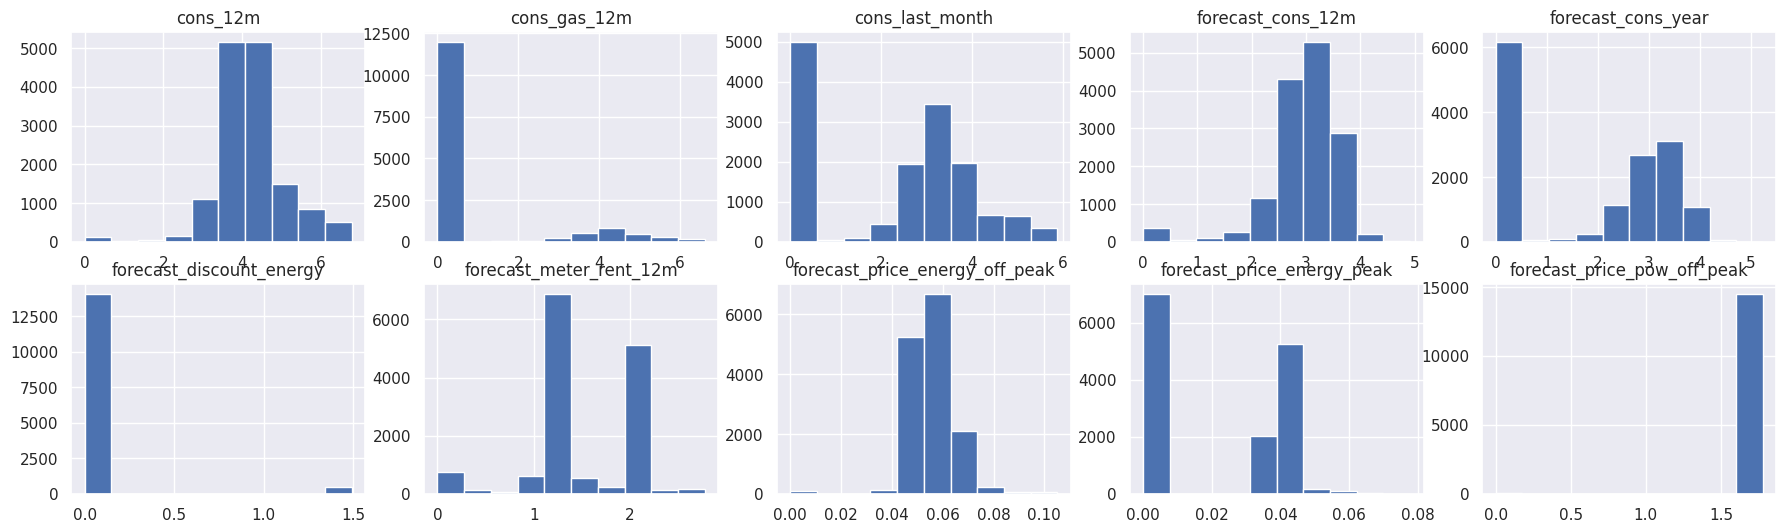

In [46]:
plt.figure(figsize=(22, 6))
j = 0
for i in range(len(log_transform)):
    plt.subplot(2,5, j+1)
    plt.hist(df[log_transform[i]])
    plt.title(log_transform[i])
    j+=1
plt.show()


### Transforming categorical data

In [47]:
cats = df.select_dtypes(include=object)

cats.head()
#we will drop id and others we will transform 

,id,channel_sales,origin_up,energy_gas_products
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,lxidpiddsbxsbosboudacockeimpuepw,eg
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,kamkkxfxxuwbdslkwifmmcsiusiuosws,e.
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,kamkkxfxxuwbdslkwifmmcsiusiuosws,e.
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,kamkkxfxxuwbdslkwifmmcsiusiuosws,e.
4,149d57cf92fc41cf94415803a877cb4b,MISSING,kamkkxfxxuwbdslkwifmmcsiusiuosws,e.


In [48]:
# we will one_hot encode the data with pd.get_dummies, but here we need to remove id col first 

data = df.copy()
data.drop('id', axis=1, inplace=True)

data = pd.get_dummies(data, drop_first=True)

data.shape


(14606, 56)

## Modeling

### Basic Random Forest Classifier (RFC)

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [52]:
features = data.drop('churn', axis=1)
labels = data['churn']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=5)

In [54]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc_score = rfc.score(X_test, y_test)
y_pred = rfc.predict(X_test)

print(rfc_score)


0.9079397672826831


In [55]:
from sklearn.metrics import classification_report, recall_score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2639
           1       0.82      0.06      0.12       283

    accuracy                           0.91      2922
   macro avg       0.86      0.53      0.53      2922
weighted avg       0.90      0.91      0.87      2922



In [56]:
score_recall = recall_score(y_test, y_pred)
score_recall

0.0636042402826855

In [57]:
pd.crosstab(y_test, y_pred, rownames=['true labels'], colnames=['pred labels'])

pred labels,0,1
true labels,,
0,2635,4
1,265,18


As assumed, accuracy is high, but when we check other metrics, recall is only high for class 0 since this class dominates the data set. Therefore, accuracy score of basic random forest classifier does not reflect the true predictive power of the model , we should consider recall as well. Model cannot distinguish well the churners and classifies them as retainers 

In [59]:
18/(18+265)

0.0636042402826855

Accuracy did not change much comparing to basic model, but the main issue is: Dataset is unbalanced and model shows performance for dominant class, which should not be the case. Therefore we will introduce resampling techniques and reports suitable for imbalanced datasets. 

#### RFC with oversampled dataset 

In [61]:
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from imblearn.over_sampling import SMOTE

We first oversample dataset containing all selected features

In [62]:
oversampler = SMOTE()
X_over_train, y_over_train = oversampler.fit_resample(X_train, y_train)

In [63]:
over_rfc = RandomForestClassifier()
over_rfc.fit(X_over_train, y_over_train)
over_score = over_rfc.score(X_test, y_test)
y_pred_over = over_rfc.predict(X_test)
print(over_score)
print(classification_report(y_test, y_pred_over))


0.8993839835728953
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      2639
           1       0.43      0.11      0.18       283

    accuracy                           0.90      2922
   macro avg       0.67      0.55      0.56      2922
weighted avg       0.86      0.90      0.87      2922



In [65]:
print(classification_report_imbalanced(y_test, y_pred_over))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.91      0.98      0.11      0.95      0.33      0.12      2639
          1       0.43      0.11      0.98      0.18      0.33      0.10       283

avg / total       0.86      0.90      0.20      0.87      0.33      0.12      2922



In [66]:
over_recall = recall_score(y_test, y_pred_over)
over_recall

0.11307420494699646

The geometric mean (G-mean) is the root of the product of class-wise sensitivity. This measure tries to maximize the accuracy on each of the classes while keeping these accuracies balanced. For binary classification G-mean is the squared root of the product of the sensitivity (TPR, recall) and specificity (TNR). 
Looking the geometric result in report, we can see that it identical values, but these are low (33%) and  that circumstances accuracy score is unchanhrf.


In [67]:
pd.crosstab(y_test, y_pred_over, rownames=['actual labels'], colnames=['predicted labels'])

predicted labels,0,1
actual labels,,
0,2596,43
1,251,32


After oversampling training set, it seems like that model still has issues to recognize true churners, this time number of retainers which are classified by model as churners increased (from 8 to 43) . The value of true retainers remained unchainged and high which is good.

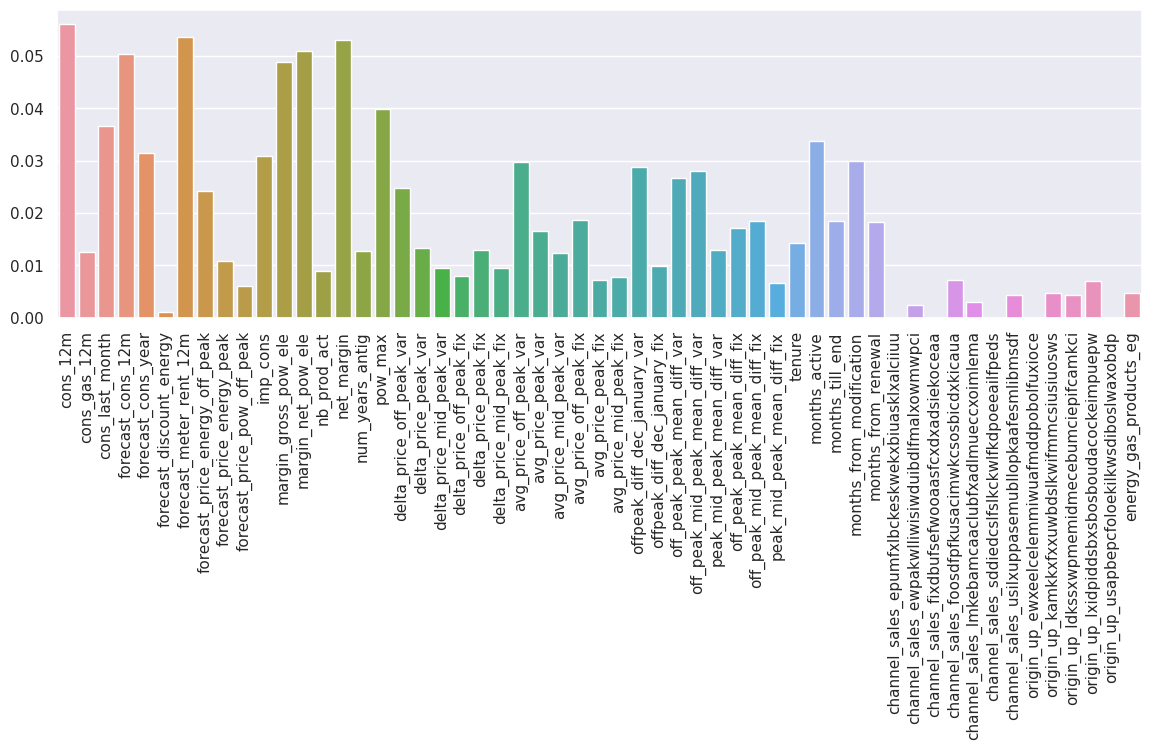

In [69]:
list_features = rfc.feature_importances_


labels = X_train.columns
f = plt.figure(figsize=(14,4))
#f.suptitle('Feature importances for base and extended RFC')
sns.barplot(x=labels, y=list_features)
plt.xticks(rotation=90)

plt.show()



-  Accuracy of RFC is on first look very good, however, it is clear that model is biased since majority of observations are for clients who retained. Precission, recall and f1 score are very low for minority class, the companies who churned. 
- To answer the initial question: If the price sensitivity main driver for customer churn ? It does not seem like as per feature importances graph, it does impacts but not as much as some other factors , like consumtion in last 12 months, consumption last month, margin on power consumption. 


In [72]:
proba_predictions = rfc.predict_proba(X_test)
probabilities = proba_predictions[:,1]

In [73]:
X_test['churn_probabilities'] = probabilities.tolist()


In [74]:
X_test['predictions'] = y_pred.tolist()
X_test.to_csv('test_sample_with_predictions.csv')

### Discount Impact 

1. When no discount is offered
2. And when a discount is offered based on a probability cutoff to decide who should receive the 20% discount

#####  Offering discount based on probability cutoff 

In [103]:
#basecase_revenue # Electricity revenue for each customer consists of energy consumption (amount * price) and the meter rent
#all 3 values we transformed logaritmically and now we need to transform back 
X_test['baseline_revenue'] = (np.power(10, X_test['forecast_cons_12m'])+1) *  X_test['forecast_price_energy_off_peak']+ X_test['forecast_meter_rent_12m']

#with churn average 100% if churn right away in Jan2016, or 59/360 days if end of Feb)  = 1+0.8383 / 2 = 0.919
X_test['baseline_revenue_after_churn'] = X_test['baseline_revenue'] * (1-0.919 * X_test['predictions'])



In [105]:
def get_rev_delta(pred: pd.DataFrame, cutoff: float=0.5, discount: float=0.2) -> float:
    """
    Get the delta of revenues for offering discount for all customers with predicted churn risk >= cutoff
    """
    pred['discount_revenue'] = pred['baseline_revenue_after_churn']
    # Churn predicted => discount is given => customer stays for full year, independent of whether the prediction
    # (false positive, "free"/unnecessary discount given) or correct
    pred.loc[pred['churn_probabilities'] >= cutoff, 'discount_revenue'] = pred['baseline_revenue'] * (1 - discount)
    # Save the revenue delta for each customer in a separate column
    pred['revenue_delta'] = pred['discount_revenue'] - pred['baseline_revenue_after_churn']
    return pred['revenue_delta'].sum()

In [106]:
rev_deltas = pd.Series({cutoff: get_rev_delta(X_test, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})

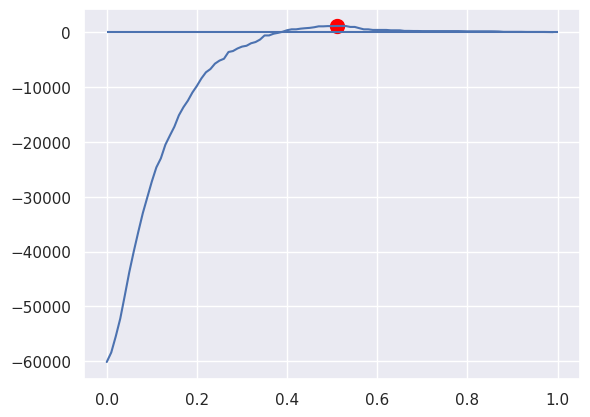

Maximum benefit at cutoff 0.51 with revenue delta of $1,136.50


In [107]:
def plot_tradeoff(rev_deltas: pd.Series):
    # Plot the revenue deltas
    rev_deltas.plot()
    # Mark optimal point
    max_pred = rev_deltas.idxmax()
    plt.scatter(max_pred, rev_deltas.loc[max_pred], s=100, c='red')
    # Reference line for break-even
    plt.hlines(0, 0, 1)
    plt.show()
    print(f'Maximum benefit at cutoff {max_pred} with revenue delta of ${rev_deltas.loc[max_pred]:,.2f}')

plot_tradeoff(rev_deltas)